### Übungsblatt 2 Aufgabe 5 - Rubin Mehralivand
Im folgenden betrachten wir das AWA:
$$f(y) = \cos(\frac{\pi}{2}y) - 2y \qquad u(0) = 1$$
Auf dem Intervall $I = [t_0, t_0+T] \quad t_0 = 0, T = 2$.<br>
Wir nähern die AWA durch den eulerschen Polygonzug an, also wir berechnen die Iterationsvorschrift für verschiedene Gitter gegeben durch die Schrittweite $h^{-k}, \\ t_n = t_0 + nh$ und die Schrittanzahl $n = \frac{T}{h}$:
$$y_0^h = u_0$$
$$y^h_{n+1} = y^h_n + h f(y_n^h)$$
Schlussendlich berechnen wir die Konvergenzrate mit der Vorschrift
$$||y^h_N - y^{2h}_N||$$



In [183]:
import numpy as np
import matplotlib.pyplot as plt

In [184]:
def euler_polygonzug(f, t0: float, u0: int, t_end: int, h: float) -> tuple:
    '''
    Implementiert die explizite Eulermethode auf einem endlichen Intervall.
    :param f: Rechte Seite der AWA (auszuwertende Funktion)
    :param t0: Intervallbeginn
    :param u0: Anfangswert
    :param t_end: Intervallende
    :param h: Schrittweite
    :return: Gitterpunkte ts und Funktionswerte ys
    '''
    stepsize = int(t_end/h) # Berechne Schrittanzahl aus Intervallende und Schrittgröße
    grid = np.linspace(t0, t_end, stepsize) # Erstelle Gitter mit der linspace()-Methode
    n = grid.shape[0]
    yn = np.zeros(n)
    yn[0] = u0 # Setze den ersten Wert des Lösungsvektors auf den Anfangswert

    for i in range(0,n-1):
        # Explizite Eulermethode
        yn[i+1] = yn[i] + h*f(yn[i])

    return grid, yn

In [185]:
def f(y: float):
    return np.cos((np.pi/2)*y) - 2*y # Auszuwertende rechte Seite

In [186]:
def error_calculation(f, t0: float, u0: int, t_end: int, h: float) -> np.array:
    '''
    Diese Methode führt zwei Mal die Eulermethode für h und 2h durch und schätzt dann den Fehler ab.
    :param f: Rechte Seite der AWA (auszuwertende Funktion)
    :param t0: Intervallbeginn
    :param u0: Anfangswert
    :param t_end: Intervallende
    :param h: Schrittweite
    :return: Fehlervektor y_error
    '''
    stepsize = int(t_end/h)
    grid = np.linspace(t0, t_end, stepsize)
    n = grid.shape[0]

    yn = np.zeros(n)
    y_half = np.zeros(n)

    yn[0] = u0
    y_half[0] = u0

    for i in range(0,n-1):
        # Hier findet die Fehlerberechnung statt
        yn[i+1] = yn[i] + h*f(yn[i])
        y_half[i+1] = y_half[i] + 2*h*f(y_half[i])

    return np.absolute(yn - y_half)

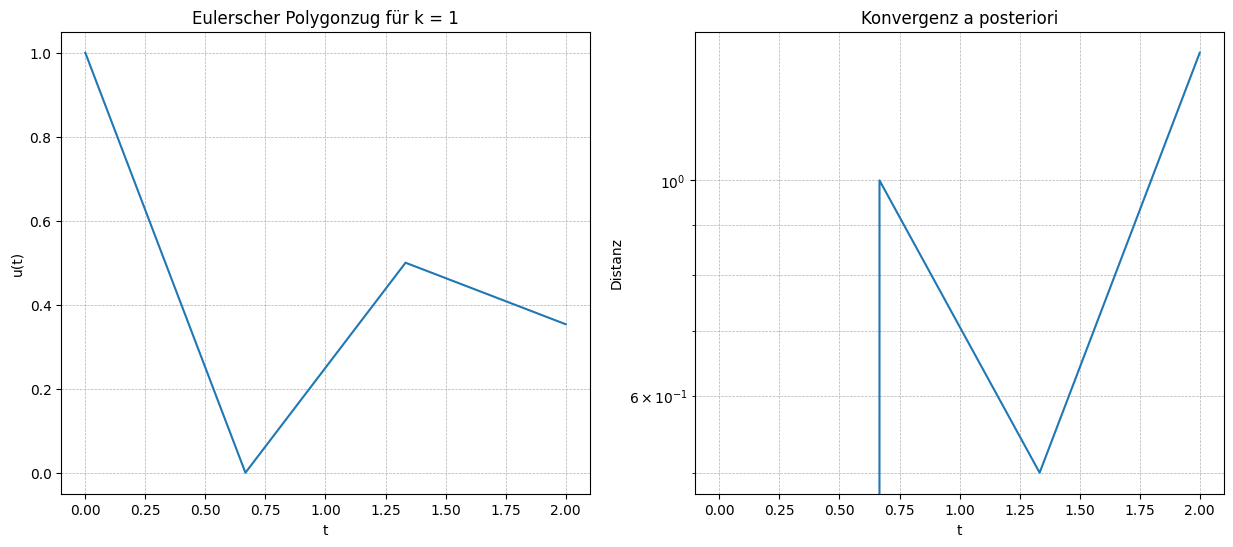

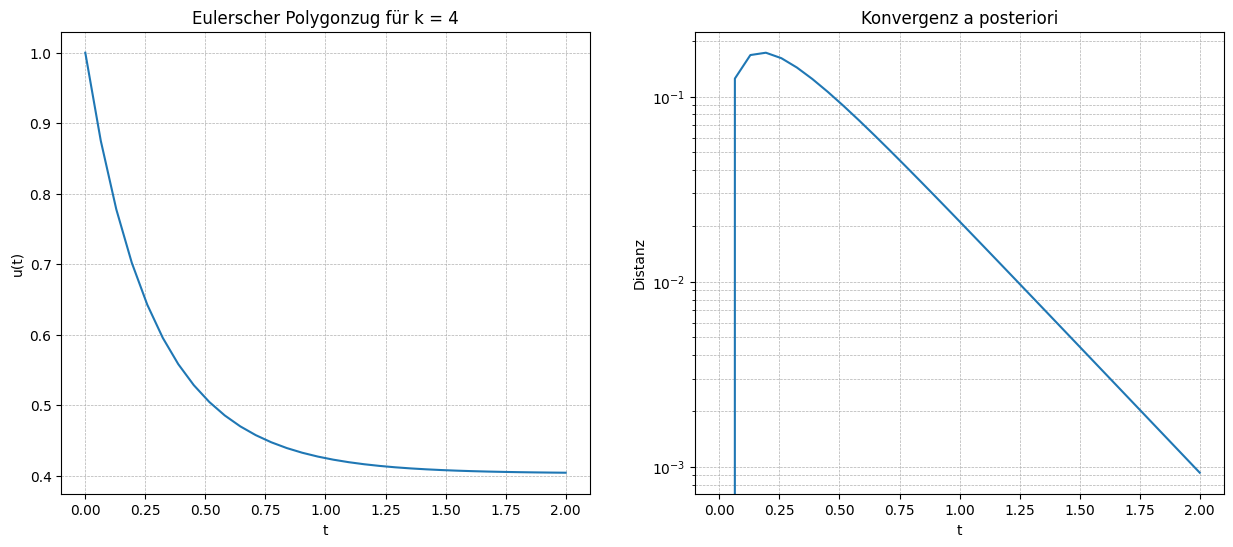

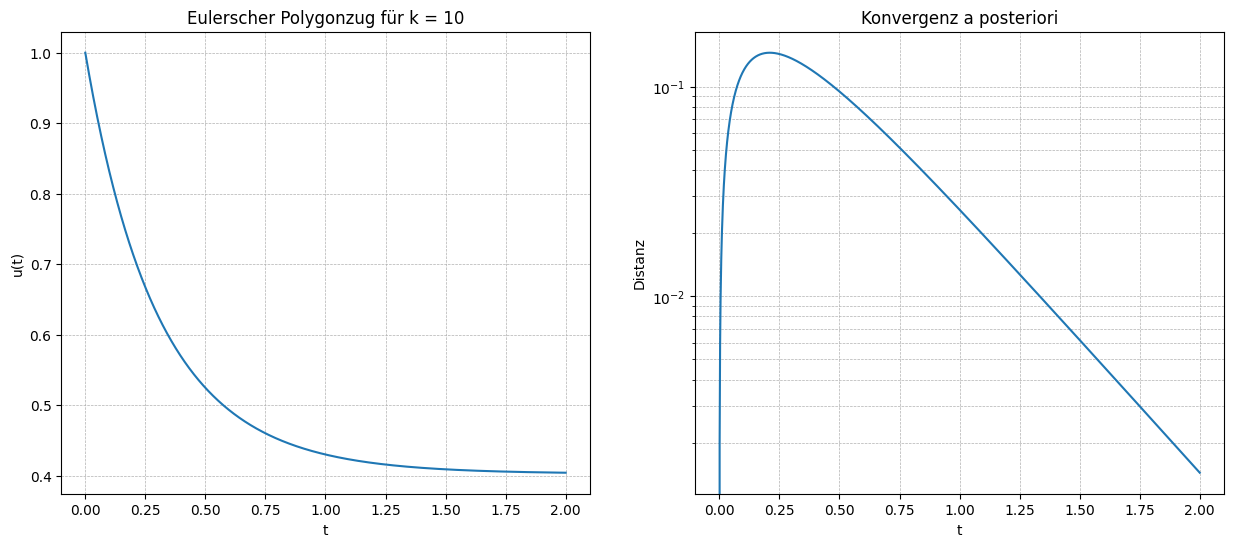

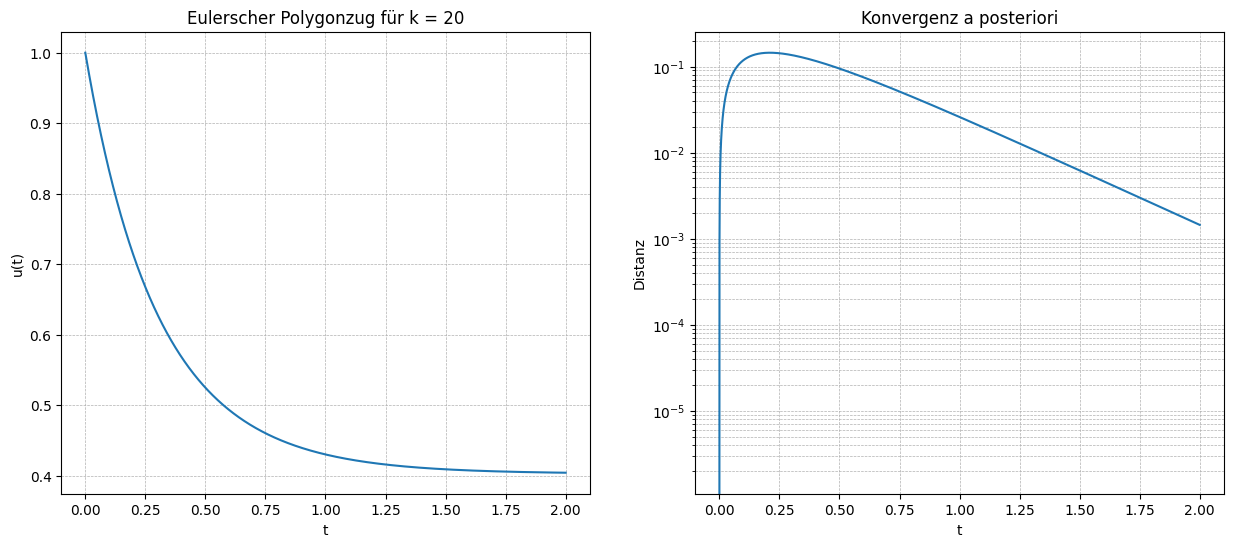

In [187]:
for k in [1, 4, 10, 20]:
    # Konstanten für die Auswertung auf k = 1,2,...
    t0 = 0
    u0 = 1
    T = 2
    h = 2**(-k)

    ts, ys = euler_polygonzug(f, t0, u0, T, h)
    y_error = error_calculation(f, t0, u0, T, h)

    # Uninteressantes Plotting
    plt.figure(figsize=(15, 6))
    plt.subplot(1,2,1)
    plt.plot(ts, ys, label="Trajektorie")
    plt.xlabel("t")
    plt.ylabel("u(t)")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.title(f"Eulerscher Polygonzug für k = {k}")

    plt.subplot(1,2,2)
    plt.plot(ts, y_error, label="Fehlerrate")
    plt.xlabel("t")
    plt.ylabel("Distanz")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.yscale('log')
    plt.title("Konvergenz a posteriori")

    plt.show()

### Auswertung
Die Funktion konvergiert (wie man anhand der rechten Graphen sieht) ungefähr linear. Somit ist die Eulermethode nicht besonders effizient (und für große Schrittweiten unglaublich ungenau).